### Bo's Dataset and Intersection Volume 2022-02
This file loads Bo's dataset/shapefile for cycling stress classification:<br>
(https://github.com/lin-bo/Toronto_LTS_network) <br>
Based off of the full Toronto Centreline dataset: <br> 
(found at https://ckan0.cf.opendata.inter.prod-toronto.ca/ne/dataset/toronto-centreline-tcl) <br>
It also loads in traffic volumes at intersections taken from Toronto's Open Data Portal: <br>
(https://open.toronto.ca/dataset/traffic-signal-vehicle-and-pedestrian-volumes/)

Work performed:
- load data
- perform eda in combination with traffic counts. Combine datasets using geospatial joins.
- store in geopandas df and create some plots for EDA. Look at the trends over time

#### Imports:

In [1]:
# Import 3rd party libraries
import os
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('dark_background')
#plt.style.use('ggplot')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

#### Import the raw data into a dataframe
data is in the raw data project folder. Includes intersections data, shapefile, and Bo's classifications

In [5]:
# Import the intersection data
intersections = pd.read_csv('C:/Users/Keagan Rankin/Documents/PycharmProj/data/raw_data/traffic-signal-vehicle-and-pedestrian-volumes-data.csv')
print(intersections.info())
intersections.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TCS #                        2280 non-null   int64  
 1    Main                        2280 non-null   object 
 2    Midblock Route              175 non-null    object 
 3    Side 1 Route                2280 non-null   object 
 4    Side 2 Route                758 non-null    object 
 5   Activation Date              2280 non-null   object 
 6   Latitude                     2280 non-null   float64
 7   Longitude                    2280 non-null   float64
 8   Count Date                   2280 non-null   object 
 9   8 Peak Hr Vehicle Volume     2280 non-null   int64  
 10  8 Peak Hr Pedestrian Volume  2280 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 196.1+ KB
None


,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume
0,2,JARVIS ST,NaN,FRONT ST E,NaN,11/15/1948,43.649418,-79.371446,06-21-2017,15662,13535
1,3,KING ST E,NaN,JARVIS ST,NaN,08/23/1950,43.650461,-79.371924,09-17-2016,12960,7333
2,4,JARVIS ST,NaN,ADELAIDE ST E,NaN,09/12/1958,43.651534,-79.372360,11-08-2016,17770,7083
3,5,JARVIS ST,NaN,RICHMOND ST E,NaN,04/21/1962,43.652718,-79.372824,12-08-2015,19678,4369
4,6,JARVIS ST,NaN,QUEEN ST E,NaN,08/24/1928,43.653704,-79.373238,09-17-2016,14487,3368


In [43]:
# convert to pandas dataframe using lat long and plot
intersections_gpd = gpd.GeoDataFrame(intersections, geometry=gpd.points_from_xy(intersections.Longitude, intersections.Latitude))

# View Frame
intersections_gpd.head()
intersections_gpd.iloc[2261]

TCS #                                                    2377
 Main                                               YONGE ST 
 Midblock Route                                           NaN
 Side 1 Route                                  YORKVILLE AVE 
 Side 2 Route                                             NaN
Activation Date                                    04-20-2016
Latitude                                            43.671923
Longitude                                          -73.389642
Count Date                                         01-18-2017
8 Peak Hr Vehicle Volume                                 7803
8 Peak Hr Pedestrian Volume                              5014
geometry                       POINT (-73.3896419 43.6719226)
Name: 2261, dtype: object

,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume,geometry
2228,2312,STEELES AVE W,NaN,ALBION RD,REGIONAL RD 50,08/01/2012,43.749850,-79.639290,05-15-2015,29577,19,POINT (-79.63929 43.74985)
2023,2072,ALBION RD,NaN,CODLIN CRES,CLAIREPORT CRES,06/21/2006,43.747780,-79.632450,05-24-2016,11876,81,POINT (-79.63245 43.74778)
1992,2037,ALBION RD,NaN,STEINWAY BLVD,PRIVATE ACCESS,01/10/2006,43.748050,-79.628760,05-24-2016,13276,102,POINT (-79.62876 43.74805)
1944,1980,STEELES AVE W,NaN,SIGNAL HILL AVE,PRIVATE ACCESS,10/08/2003,43.753060,-79.625110,05-15-2015,16258,305,POINT (-79.62511 43.75306)
2098,2154,HUMBERWOOD BLVD,NaN,MORNING STAR DR,NaN,06/11/2008,43.726157,-79.622225,10-05-2009,7890,374,POINT (-79.62223 43.72616)
...,...,...,...,...,...,...,...,...,...,...,...,...
1875,1901,PORT UNION RD,NaN,CONFERENCE BLVD,NaN,08/21/2001,43.786142,-79.139429,08-08-2016,7603,211,POINT (-79.13943 43.78614)
2110,2167,PORT UNION RD,NaN,ADENMORE RD,CLAPPISON BLVD,08/28/2008,43.781342,-79.137631,01-25-2010,6168,293,POINT (-79.13763 43.78134)
1568,1574,LAWRENCE AVE E,NaN,PORT UNION RD,NaN,04/05/1989,43.779630,-79.136690,05-19-2016,8095,519,POINT (-79.13669 43.77963)
1819,1838,LAWRENCE AVE E,NaN,EAST AVE,PRIVATE ACCESS,08/16/1999,43.780720,-79.131590,01-25-2018,3522,1394,POINT (-79.13159 43.78072)


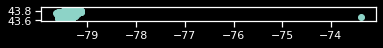

In [44]:
# There is an outlier longitude value in the geometry.
intersections_gpd.plot()

# Sort by ascending.
intersections.sort_values(by='Longitude', ascending=True)

#### EDA: Clean and explore the volumetric intersection data

In [45]:
# The outlier value is a young street. -73 might be an improper input of -79. Remove it for now and plot
intersections_gpd = intersections_gpd.drop(index=2261)

<AxesSubplot:>

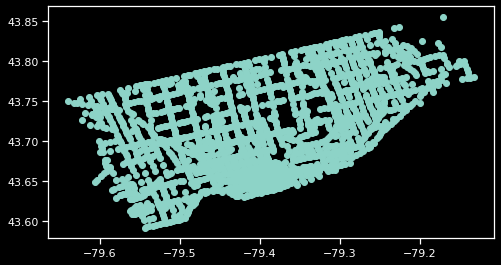

In [46]:
intersections_gpd.plot(figsize=(8,8))

       8 Peak Hr Vehicle Volume  8 Peak Hr Pedestrian Volume
count               2279.000000                  2279.000000
mean               15752.650724                  1988.800351
std                 7347.724775                  3985.331311
min                 1081.000000                     0.000000
25%                10388.500000                   280.000000
50%                14270.000000                   712.000000
75%                19558.500000                  1699.000000
max                56432.000000                 47561.000000


<AxesSubplot:>

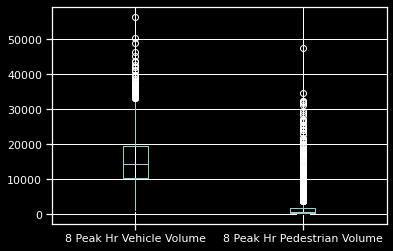

In [47]:
# Look for outliers in the peak volume data.
print(intersections_gpd[['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume']].describe())
intersections_gpd[['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume']].boxplot()

3827.5


<AxesSubplot:>

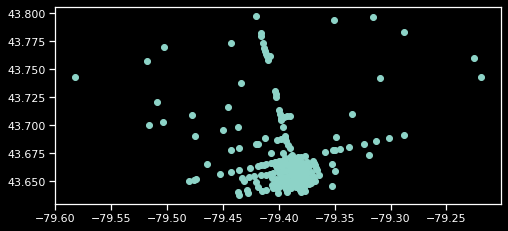

In [48]:
# It looks like there are some outliers in Pedestrian Volume; These could be dependant on street or days taken.
# Define outliers using IQR
outlier = 1699 + (1699 - 280) * 1.5
print(outlier)

# Look at geospatial distribution of pedestrian volume outliers; most are downtown. Makes sense!
intersections_gpd[intersections_gpd['8 Peak Hr Pedestrian Volume'] >= outlier].plot(figsize=(8,8))

#### Import Bo's data

In [15]:
# import Bo's shapefile
lts_gpd = gpd.read_file('C:/Users/Keagan Rankin/Documents/PycharmProj/data/raw_data/Bo Github Data/centerline_LTS_July2021.shp')

# View 
print(lts_gpd.crs)
print(lts_gpd.info())
lts_gpd.head()

epsg:4326
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59554 entries, 0 to 59553
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    59554 non-null  int64   
 1   GEO_ID      59554 non-null  int64   
 2   LFN_ID      59554 non-null  int64   
 3   LF_NAME     59554 non-null  object  
 4   FNODE       59554 non-null  int64   
 5   TNODE       59554 non-null  int64   
 6   ONE_WAY_DI  59554 non-null  int64   
 7   length_in_  59554 non-null  float64 
 8   GEO_ID_1    59554 non-null  int64   
 9   LTS         59554 non-null  int64   
 10  Shape_Leng  59554 non-null  float64 
 11  geometry    59554 non-null  geometry
dtypes: float64(2), geometry(1), int64(8), object(1)
memory usage: 5.5+ MB
None


,OBJECTID,GEO_ID,LFN_ID,LF_NAME,FNODE,TNODE,ONE_WAY_DI,length_in_,GEO_ID_1,LTS,Shape_Leng,geometry
0,1,30079678,19155,Waterfront Trl,30079676,30079656,0,457.224811,30079678,1,0.004459,"LINESTRING (-79.54478 43.58583, -79.54478 43.5..."
1,2,30079680,19166,Marie Curtis Park Trl,30079676,30079679,0,35.226524,30079680,1,0.000426,"LINESTRING (-79.54478 43.58583, -79.54483 43.5..."
2,3,30079677,19155,Waterfront Trl,30008708,30079676,0,37.170074,30079677,1,0.000375,"LINESTRING (-79.54454 43.58611, -79.54464 43.5..."
3,4,30082310,10685,Island Rd,30008708,30082309,0,168.541328,30082310,1,0.001771,"LINESTRING (-79.54454 43.58611, -79.54433 43.5..."
4,5,30008940,19155,Waterfront Trl,30008711,30008708,0,84.289210,30008940,1,0.000892,"LINESTRING (-79.54386 43.58668, -79.54400 43.5..."


<AxesSubplot:>

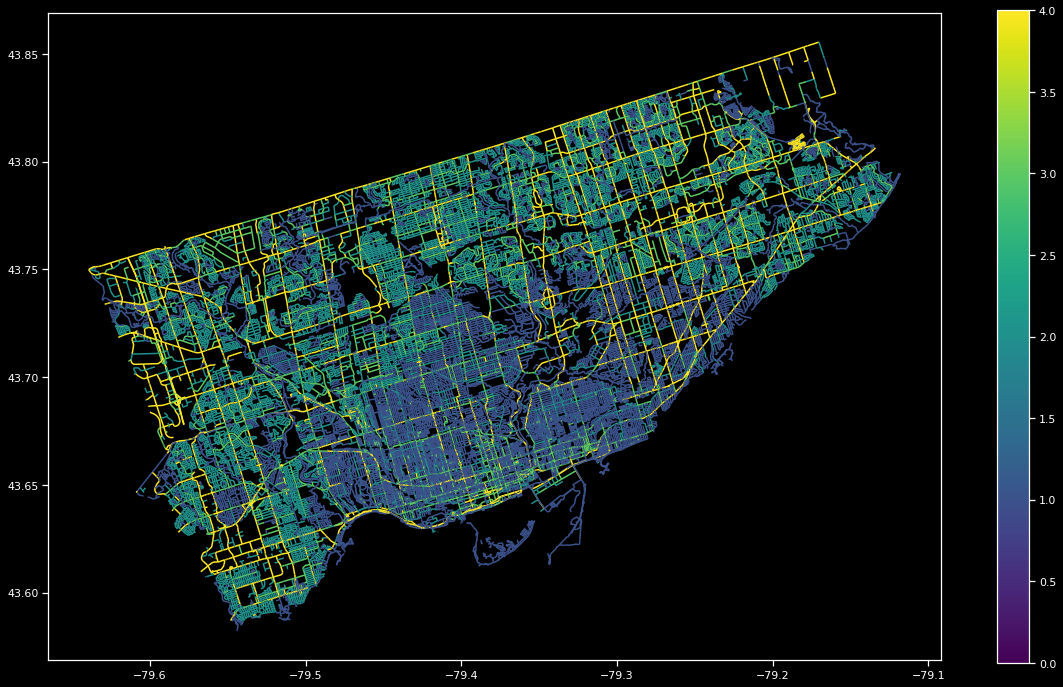

In [16]:
lts_gpd.plot(column='LTS',figsize=(20, 12), legend=True)

#### EDA: looking for null values
Look for null values in the data. Determine how we might replace them.

In [10]:
# There are no missing values in the lts data from Bo's Github, good!
lts_gpd.isnull().sum()

OBJECTID      0
GEO_ID        0
LFN_ID        0
LF_NAME       0
FNODE         0
TNODE         0
ONE_WAY_DI    0
length_in_    0
GEO_ID_1      0
LTS           0
Shape_Leng    0
geometry      0
dtype: int64

In [12]:
# only "midblock route" and "side 2 route" have null values in intersections.
intersections_gpd.isnull().sum()
# these are the "midblock descriptions" and "side street names" for the intersection. 
# Probably not features so we can ignore.

TCS #                             0
 Main                             0
 Midblock Route                2104
 Side 1 Route                     0
 Side 2 Route                  1521
Activation Date                   0
Latitude                          0
Longitude                         0
Count Date                        0
8 Peak Hr Vehicle Volume          0
8 Peak Hr Pedestrian Volume       0
geometry                          0
dtype: int64

In [31]:
# Store column names
int_col_names = intersections.columns

# Midblock route essesntially gives human readable directions to the intersection.
intersections[' Midblock Route '].unique()[0:5] 

array([nan, ' 125m NORTH OF ', ' 30m NORTH OF ', ' 265m SOUTH OF ',
       ' 127m EAST OF '], dtype=object)

In [38]:
#this gives the one way direction of a street; this may be a useful feature for our model.
lts_gpd['ONE_WAY_DI'].unique()

array([ 0,  1, -1], dtype=int64)

#### EDA: plot the intersections together with shapes and Bo's data, look at different features
Plot and look at the distribution of different features

In [103]:
# convert to the same CRS. The Shapefile has CRS epsg:4326
intersections_gpd.crs = {'init': 'epsg:4326'}
# for later work we can use EPSG:26917 if we want to measure distances.

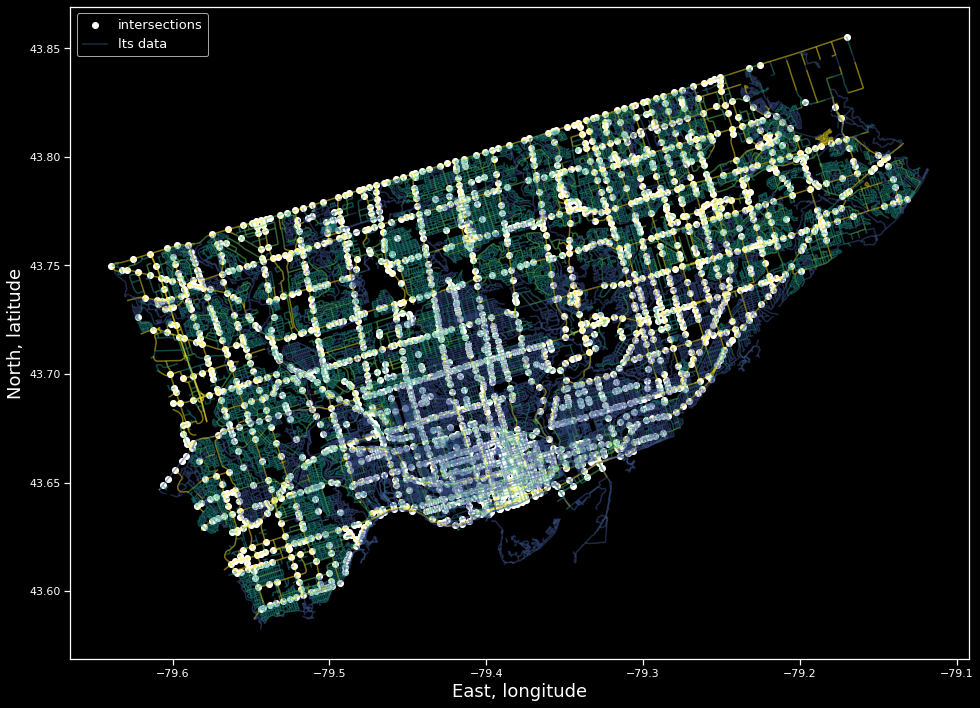

In [49]:
# Plot the two against each other. Either Bo's or the overall shapefile
ax = intersections_gpd.plot(figsize=(20, 12), label='intersections', color='white')
lts_gpd.plot(ax=ax, column='LTS', figsize=(20, 12), label='lts data', alpha=0.5)
# centrelines_cycling_gpd.plot(ax=ax, alpha=0.5, label='cycleable roads')
plt.xlabel('East, longitude', fontsize=18)
plt.ylabel('North, latitude', fontsize=18)
ax.grid(False)
plt.legend(prop={'size':13})

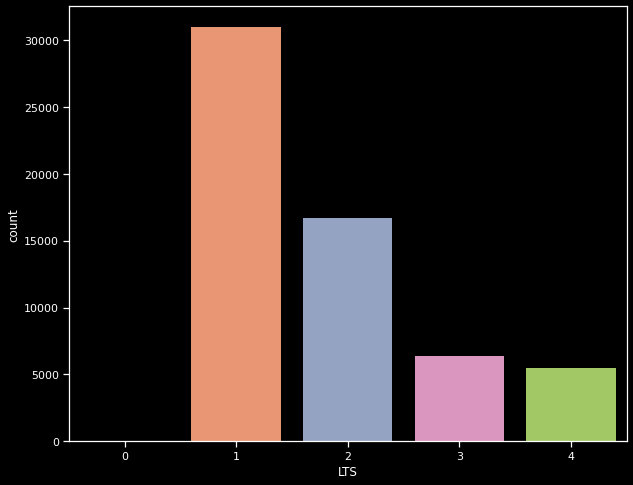

In [36]:
# Next look at the distribution of different LTS
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(data=lts_gpd, x='LTS', palette='Set2')
plt.show()

There is class imbalance to our data.<br>
However, this class imbalance may change when we engineer features based on intersection data.<br>
Next, only look at the streets that intersect with an coutned intersection.<br>
We also want to join intersections to the lines they intersect in a new master dataframe (later).<br>
Convert CRS to get a metred-scaled buffer. Assume accuracy within 5 metres. <br>

It may be possible to extrapolate intersection volumes onto connecting roads somehow in order to not lose so much data.

In [158]:
inter_metre = intersections_gpd.to_crs("EPSG:26917")
lts_metre = lts_gpd.to_crs("EPSG:26917")

inter_metre['geometry'] = inter_metre.buffer(5)
inter_metre['intersects'] = 1

test_merge = gpd.sjoin(inter_metre,
                       lts_crs,
                       how='right',
                       op='intersects')

test_merge = test_merge[test_merge['intersects'] == 1]
test_merge

,index_left,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,...,LFN_ID,LF_NAME,FNODE,TNODE,ONE_WAY_DI,length_in_,GEO_ID_1,LTS,Shape_Leng,geometry
7,240.0,242.0,LAKE SHORE BLVD W,NaN,BROWNS LINE,NaN,02/23/1960,43.592355,-79.542585,06-11-2016,...,1962,Lake Shore Blvd W,13470681,13470690,0,90.246299,9950476,3,0.001082,"LINESTRING (617707.953 4827656.478, 617679.011..."
40,1403.0,1407.0,WILLIAM R ALLEN RD,NaN,SHEPPARD AVE W,NaN,07/12/1981,43.750280,-79.463380,04-02-2014,...,6699,Sheppard Ave W,13450458,20362228,0,294.544089,20362226,4,0.003398,"LINESTRING (623712.582 4845281.702, 623667.043..."
64,239.0,241.0,LAKE SHORE BLVD W,NaN,THIRTY SEVENTH ST,PRIVATE ACCESS,01/31/1958,43.593382,-79.538092,11-12-2015,...,1962,Lake Shore Blvd W,13470656,13470661,0,99.695933,7664573,3,0.001210,"LINESTRING (618092.943 4827782.730, 617998.117..."
66,1083.0,1086.0,MARTIN GROVE RD,NaN,BETHRIDGE RD,NaN,04/26/1974,43.707560,-79.578170,04-03-2014,...,1165,Bethridge Rd,13457060,13457328,0,1051.633271,30107530,2,0.012900,"LINESTRING (615569.443 4840569.628, 615435.218..."
66,1208.0,1211.0,KIPLING AVE,NaN,BETHRIDGE RD,PRIVATE ACCESS,12/21/1977,43.709160,-79.565500,05-19-2015,...,1165,Bethridge Rd,13457060,13457328,0,1051.633271,30107530,2,0.012900,"LINESTRING (615569.443 4840569.628, 615435.218..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59483,1328.0,1331.0,QUEEN ST W,NaN,GLADSTONE AVE,SUDBURY ST,11/08/1959,43.642520,-79.427170,04-26-2016,...,4502,Sudbury St,30081937,13467944,0,332.218373,30081939,1,0.003859,"LINESTRING (627136.271 4833222.537, 627069.455..."
59508,271.0,273.0,SPADINA AVE,NaN,KING ST W,NaN,06/14/1928,43.645451,-79.395002,09-17-2016,...,3780,King St W,13467505,13467592,0,217.461671,10223667,3,0.002651,"LINESTRING (629440.255 4833748.694, 629231.648..."
59513,270.0,272.0,SPADINA AVE,NaN,FRONT ST W,NaN,12/29/1943,43.642708,-79.393895,09-17-2016,...,3472,Front St W,13467856,13467984,0,314.181702,13323711,4,0.003784,"LINESTRING (629536.292 4833447.068, 629380.639..."
59533,1263.0,1266.0,ADELAIDE ST W,NaN,DUNCAN ST,NaN,04/28/1977,43.648220,-79.388660,07-28-2010,...,3331,Duncan St,13467140,13467056,-1,73.404892,7929624,3,0.000688,"LINESTRING (629971.592 4833992.441, 629947.547..."


NOTE!, this has repeated LTS entries! As a road may connect to two intersections. We will probably want to take the average.

In [170]:
# Example; 4 way intersection.
test_merge[test_merge['index_left'] == 270]

,index_left,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,...,LFN_ID,LF_NAME,FNODE,TNODE,ONE_WAY_DI,length_in_,GEO_ID_1,LTS,Shape_Leng,geometry
15950,270.0,272.0,SPADINA AVE,NaN,FRONT ST W,NaN,12/29/1943,43.642708,-79.393895,09-17-2016,...,4426,Spadina Ave,13467927,13467856,0,65.954528,1146683,4,0.000616,"LINESTRING (629556.738 4833384.369, 629536.292..."
15991,270.0,272.0,SPADINA AVE,NaN,FRONT ST W,NaN,12/29/1943,43.642708,-79.393895,09-17-2016,...,4426,Spadina Ave,13467856,13467751,0,99.066558,14673213,4,0.000926,"LINESTRING (629536.292 4833447.068, 629520.464..."
16475,270.0,272.0,SPADINA AVE,NaN,FRONT ST W,NaN,12/29/1943,43.642708,-79.393895,09-17-2016,...,3472,Front St W,13467763,13467856,0,226.325500,10864277,4,0.002730,"LINESTRING (629748.009 4833526.969, 629638.531..."
59513,270.0,272.0,SPADINA AVE,NaN,FRONT ST W,NaN,12/29/1943,43.642708,-79.393895,09-17-2016,...,3472,Front St W,13467856,13467984,0,314.181702,13323711,4,0.003784,"LINESTRING (629536.292 4833447.068, 629380.639..."


FINISH COMBINING LTS AND INTERSECTIONS DATA. Add count date, and the avg connecting 8 Hr peak volumes to the original LTS data. <br>
This will later be one of many functions in a data pipeline file.

In [195]:
# Convert to metre crs
inter_metre = intersections_gpd.to_crs("EPSG:26917")
lts_metre = lts_gpd.to_crs("EPSG:26917")

# Set a buffer corresponding to lat lon count error; assume 5?
inter_metre['geometry'] = inter_metre.buffer(5)
inter_metre['intersects'] = 1

# Do the initial merge
initial_merge = gpd.sjoin(inter_metre, #left
                          lts_crs, #right
                          how='right',
                          op='intersects')

initial_merge = initial_merge[initial_merge['intersects'] == 1]

# Aggregate: the mean of 8 hr peaks (we might also want info on the connecting intersection index and dates).
peaks = ['index_left', 'Count Date', '8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume']
merger = initial_merge[peaks].groupby(initial_merge.index).agg({'index_left': lambda x: tuple(x),
                                                                'Count Date': lambda x: tuple(x),
                                                                '8 Peak Hr Vehicle Volume': 'mean',
                                                                '8 Peak Hr Pedestrian Volume': 'mean'}
                                                               )

# Combine merger with the lts data.
lts_intersections_avg = pd.merge(left=lts_metre,
                                right=merger,
                                how='left',
                                left_index=True,
                                right_index=True,
                               )

# Show new frame
lts_intersections_avg[lts_intersections_avg['index_left'].notnull()]

,OBJECTID,GEO_ID,LFN_ID,LF_NAME,FNODE,TNODE,ONE_WAY_DI,length_in_,GEO_ID_1,LTS,Shape_Leng,geometry,index_left,Count Date,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume
7,8,9950476,1962,Lake Shore Blvd W,13470681,13470690,0,90.246299,9950476,3,0.001082,"LINESTRING (617707.953 4827656.478, 617679.011...","(240.0,)","(06-11-2016,)",12072.0,987.0
40,41,20362226,6699,Sheppard Ave W,13450458,20362228,0,294.544089,20362226,4,0.003398,"LINESTRING (623712.582 4845281.702, 623667.043...","(1403.0,)","(04-02-2014,)",43882.0,1287.0
64,65,7664573,1962,Lake Shore Blvd W,13470656,13470661,0,99.695933,7664573,3,0.001210,"LINESTRING (618092.943 4827782.730, 617998.117...","(239.0,)","(11-12-2015,)",13675.0,1763.0
66,67,30107530,1165,Bethridge Rd,13457060,13457328,0,1051.633271,30107530,2,0.012900,"LINESTRING (615569.443 4840569.628, 615435.218...","(1083.0, 1208.0)","(04-03-2014, 05-19-2015)",14225.5,154.5
84,85,7940518,86,Danforth Ave,13460873,13460850,0,57.515147,7940518,1,0.000701,"LINESTRING (635334.516 4838140.063, 635389.575...","(1469.0,)","(05-07-2015,)",10390.0,3336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59483,59484,30081939,4502,Sudbury St,30081937,13467944,0,332.218373,30081939,1,0.003859,"LINESTRING (627136.271 4833222.537, 627069.455...","(1328.0,)","(04-26-2016,)",10496.0,1546.0
59508,59509,10223667,3780,King St W,13467505,13467592,0,217.461671,10223667,3,0.002651,"LINESTRING (629440.255 4833748.694, 629231.648...","(271.0,)","(09-17-2016,)",17090.0,14705.0
59513,59514,13323711,3472,Front St W,13467856,13467984,0,314.181702,13323711,4,0.003784,"LINESTRING (629536.292 4833447.068, 629380.639...","(270.0,)","(09-17-2016,)",19268.0,4619.0
59533,59534,7929624,3331,Duncan St,13467140,13467056,-1,73.404892,7929624,3,0.000688,"LINESTRING (629971.592 4833992.441, 629947.547...","(1263.0,)","(07-28-2010,)",9502.0,3714.0


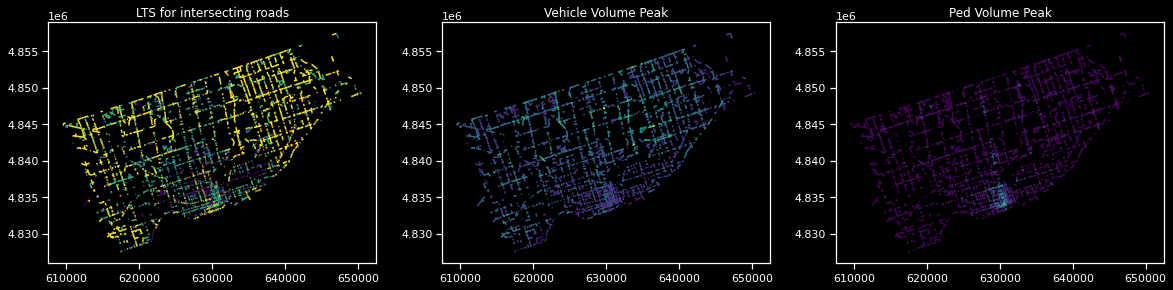

In [198]:
# Plot the above to show the new data.
fig, axs = plt.subplots(figsize=(20,12), ncols=3, nrows=1)

# Plotting
lts_intersections_avg[lts_intersections_avg['index_left'].notnull()].plot(ax=axs[0], column='LTS')
lts_intersections_avg.plot(ax=axs[1], column='8 Peak Hr Vehicle Volume')
lts_intersections_avg.plot(ax=axs[2], column='8 Peak Hr Pedestrian Volume')

# Attributes
axs[0].title.set_text('LTS for intersecting roads')
axs[1].title.set_text('Vehicle Volume Peak')
axs[2].title.set_text('Ped Volume Peak')

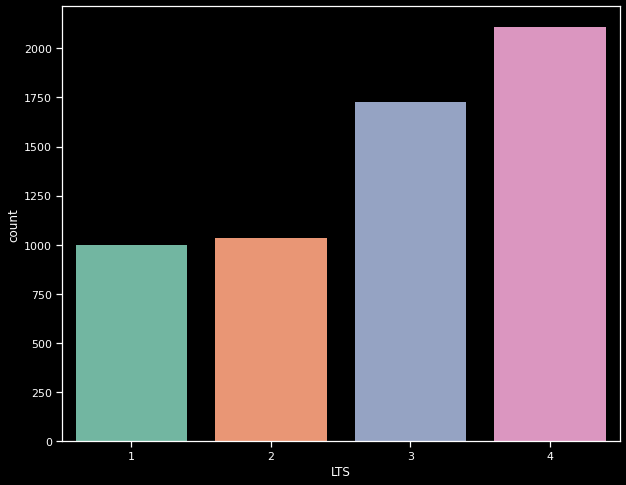

In [199]:
# Now plot the class sizes with the remaining data.
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(data=lts_intersections_avg[lts_intersections_avg['index_left'].notnull()],
                   x='LTS',
                   palette='Set2')
plt.show()